Daily Challenge: Interactive Data Visualization with Matplotlib and Seaborn

1. Data Preparation:

In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler


In [3]:
# Load the dataset

df = pd.read_excel("US Superstore data.xls")

In [4]:
# Initialchecking of dataset

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
# 1. What is the data type of the date columns?

print("Order Date type:", df['Order Date'].dtype)
print("Ship Date type:", df['Ship Date'].dtype)

Order Date type: datetime64[ns]
Ship Date type: datetime64[ns]


In [10]:
# 2. What is the time frame of the dataset?

print("Date Range:")
print("Order Date:", df['Order Date'].min(), "to", df['Order Date'].max())

Date Range:
Order Date: 2014-01-03 00:00:00 to 2017-12-30 00:00:00


In [11]:
# 3. Feature Engineering

# Profit margin
df['Profit Margin (%)'] = df.apply(lambda row: (row['Profit'] / row['Sales'] * 100) if row['Sales'] != 0 else 0, axis=1)


# Order Year and Month

df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month_name()

In [12]:
# Nettoyage si besoin

df.drop_duplicates(inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.to_period('M').astype(str)
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

2. Data Visualization with Matplotlib

In [18]:
pip install ipywidgets

  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.14-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl.metadata (20 kB)
Using cached ipywidgets-8.1.7-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl (216 kB)
Using cached widgetsnbextension-4.0.14-py3-none-any.whl (2.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [ipywidgets]
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact, widgets

df = pd.read_excel("US Superstore data.xls")

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


2. Data Visualization with Matplotlib:

In [ ]:
#  2.1: Time-Series Sales Trend
sales_by_month = df.groupby(['Order Date', 'Category'])['Sales'].sum().reset_index()

@interact(category=widgets.Dropdown(options=df['Category'].unique(), description="Category:"))
def plot_sales_trend(category):
    data = sales_by_month[sales_by_month['Category'] == category]
    plt.figure(figsize=(14, 5))
    plt.plot(data['Order Date'], data['Sales'], marker='o')
    plt.title(f"Monthly Sales Trend for {category}")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


interactive(children=(Dropdown(description='Category:', options=('Furniture', 'Office Supplies', 'Technology')…

# Observation

* We get an interactive graphic thanks to ipywidgets which allows to filter sales by product category, here 3.

* We see month/year variations that differ according to the product category.



 2.2: Geographic Sales Performance

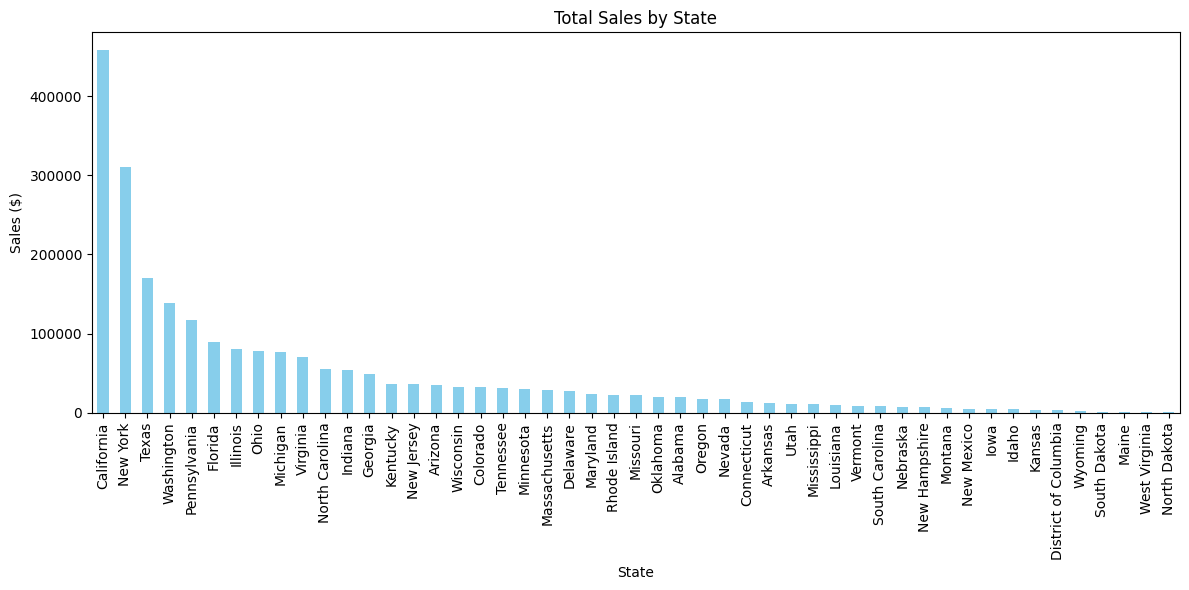

In [ ]:
# Which states have the most sales?

state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
state_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by State")
plt.ylabel("Sales ($)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

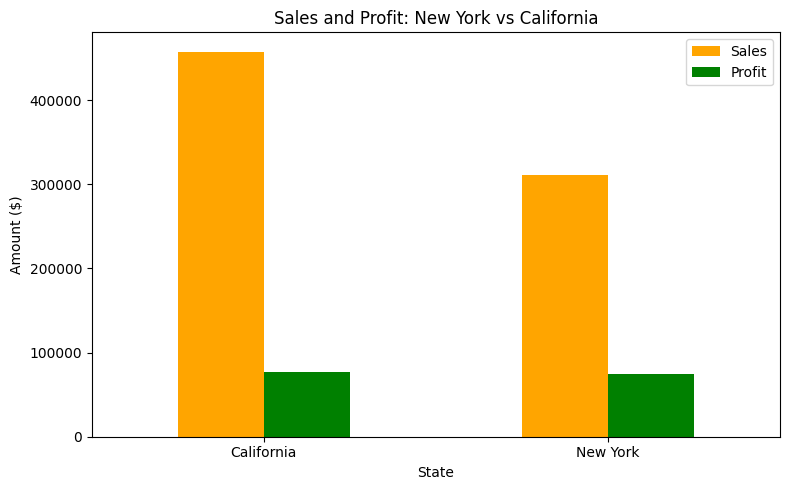

In [ ]:
# Comparison New York and California (Sales & Profit)

df_ny_ca = df[df['State'].isin(['New York', 'California'])]
comparison = df_ny_ca.groupby('State')[['Sales', 'Profit']].sum()
comparison.plot(kind='bar', figsize=(8,5), color=['orange','green'])
plt.title("Sales and Profit: New York vs California")
plt.ylabel("Amount ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Observation

California daminates both segments.

In [14]:
from IPython.display import display


3. Data Visualization with Seaborn

In [15]:
# Agréger les ventes par État
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index()

# Fonction d'affichage du graphique avec un Top N dynamique
def plot_top_states(n):
    top_states = sales_by_state.head(n)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_states, x='Sales', y='State', hue='State', palette='viridis', legend=False)
    plt.title(f'Top {n} States by Total Sales')
    plt.xlabel('Total Sales ($)')
    plt.ylabel('State')
    plt.tight_layout()
    plt.show()

# Slider interactif pour le top N
slider = widgets.IntSlider(value=10, min=3, max=20, step=1, description='Top N States:')
widgets.interact(plot_top_states, n=slider)

interactive(children=(IntSlider(value=10, description='Top N States:', max=20, min=3), Output()), _dom_classes…

<function __main__.plot_top_states(n)>

# Observation

* Top 3: California / New-York and Texas with huge differences.California is +35% vs New Yorkand about +60% vs Texas.

* 4 states close the chart, quasi equal.

#### 1. Top 10 Most profitable products


/var/folders/r6/h24sb_sj1c579ck062z_39dm0000gn/T/ipykernel_51358/333403613.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
/var/folders/r6/h24sb_sj1c579ck062z_39dm0000gn/T/ipykernel_51358/333403613.py:16: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/teddan/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


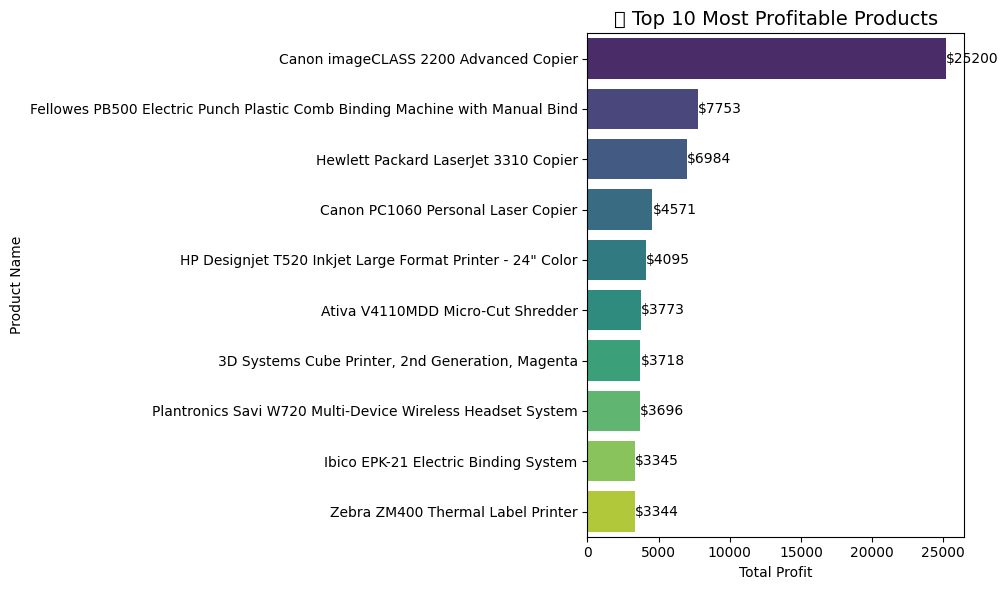

In [18]:
# Regrouper par nom de produit et totaliser le profit
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

# Tracer un barplot horizontal
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")

# Ajouter les annotations sur les barres
for i, value in enumerate(top_products.values):
    ax.text(value + 10, i, f"${value:.0f}", va='center')

plt.title("🔝 Top 10 Most Profitable Products", fontsize=14)
plt.xlabel("Total Profit")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

# Observation

* One product is really winning the spot, Canon imageClass 2200, x 4 vs the second product and x 5. From Top 4 till end, the decrease is regular (x 8 for the last one).

# 2. Relation entre Discount et Profit 

/var/folders/r6/h24sb_sj1c579ck062z_39dm0000gn/T/ipykernel_51358/3953892701.py:12: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/teddan/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


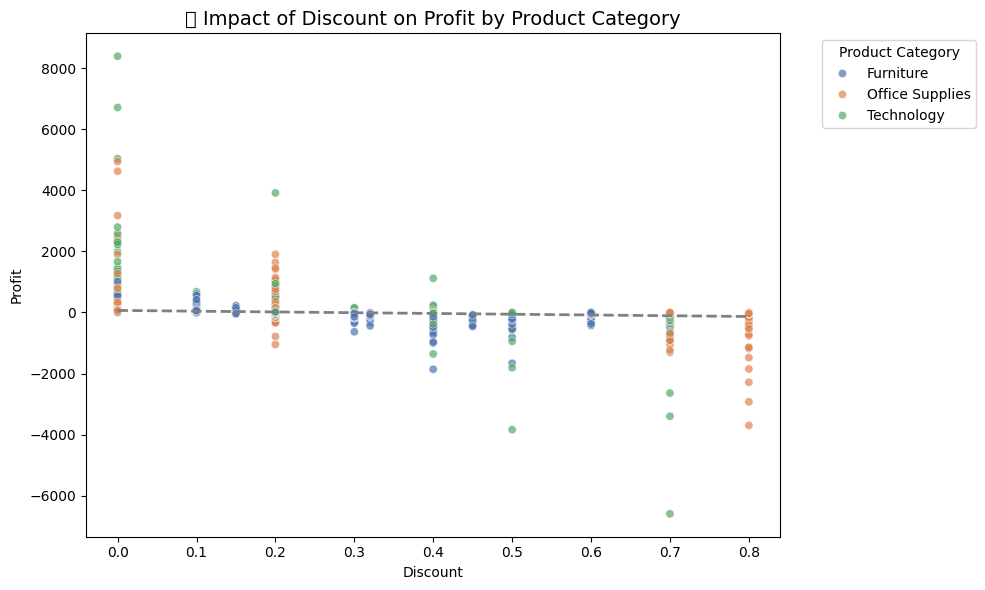

In [ ]:
# Scatter plot with discount in x, profit in y, color by category

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', palette='deep', alpha=0.7)

sns.regplot(data=df, x='Discount', y='Profit', scatter=False, color='grey', line_kws={"linewidth": 2, "linestyle": "dashed"})

plt.title("💸 Impact of Discount on Profit by Product Category", fontsize=14)
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Observation


